<a href="https://colab.research.google.com/github/andrewm-bose/Data-Science-Bootcamp-Assignments/blob/master/Andrew_M_Bose_Intro_Assignment_8_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School, Intro to Data Science, Day 8 — Classification!

## Assignment

Run this cell to load the Titanic data:

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [0]:
train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)
target = 'survived'

Then, train a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba), [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), or [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model. Use any features and parameters you want. 

Try to get better than 78.0% accuracy on the test set! (This is not required, but encouraged.)

Do refer to the lecture notebook — but try not to copy-paste.

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

After this, you may want to try [Kaggle's Titanic challenge](https://www.kaggle.com/c/titanic)!

In [0]:
#WHAT DOES THE DATA LOOK LIKE?
print('Train shape: ' + str(train.shape) + ', Test shape: ' + str(test.shape) )
print(train.head())
print(train.isnull().sum())
print(test.head())
print(test.isnull().sum())

Train shape: (668, 14), Test shape: (223, 14)
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
105         0       3    male  28.0      0      0   7.8958        S   Third   
68          1       3  female  17.0      4      2   7.9250        S   Third   
253         0       3    male  30.0      1      0  16.1000        S   Third   
320         0       3    male  22.0      0      0   7.2500        S   Third   
706         1       2  female  45.0      0      0  13.5000        S  Second   

       who  adult_male deck  embark_town  alone  
105    man        True  NaN  Southampton   True  
68   woman       False  NaN  Southampton  False  
253    man        True  NaN  Southampton  False  
320    man        True  NaN  Southampton   True  
706  woman       False  NaN  Southampton   True  
survived         0
pclass           0
sex              0
age            133
sibsp            0
parch            0
fare             0
embarked         2
class            0
who     

## CLEAN THE DATA
### Fix NaN in 'age'
### 'deck' missing too many values -> drop
###'embark_town' & 'embarked' missing in a couple rows -> drop rows

In [0]:
#DROP DECK - MISSING TOO MANY VALUES 
#(DON'T DO FOR TEST, DON'T MESS WITH TEST DATA) ?
train = train.drop('deck', axis=1)

In [0]:
train_cl = train
test_cl = test

#CLEAN 'age'
train_cl.age.fillna(train_cl.age.mean(), inplace = True)
test_cl.age.fillna(test_cl.age.mean(), inplace = True)


#CLEAN 'embark_town'
pre_drop_len = train.shape[0]
train_cl = train_cl.dropna(subset = ['embarked', 'embark_town'])
post_drop_len = train_cl.shape[0]

test_cl = test_cl.dropna(subset = ['embarked', 'embark_town'])

print('Train Rows dropped: ' + str(pre_drop_len - post_drop_len))
print(train_cl.head(5))
print(train_cl.isnull().sum())
print('')
print(test_cl.head(5))
print(test_cl.isnull().sum())


Train Rows dropped: 2
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
105         0       3    male  28.0      0      0   7.8958        S   Third   
68          1       3  female  17.0      4      2   7.9250        S   Third   
253         0       3    male  30.0      1      0  16.1000        S   Third   
320         0       3    male  22.0      0      0   7.2500        S   Third   
706         1       2  female  45.0      0      0  13.5000        S  Second   

       who  adult_male  embark_town  alone  
105    man        True  Southampton   True  
68   woman       False  Southampton  False  
253    man        True  Southampton  False  
320    man        True  Southampton   True  
706  woman       False  Southampton   True  
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

##PRE-PROCESS
###Convert strings to ints - sex, embarked, class, who, embark_town, adult_male, alone

In [0]:
#WHAT ARE POSSIBLE VALUES?
print('sex: '        + str(set(train_cl.sex)))
print('embarked: '   + str(set(train_cl.embarked)))
print('who: '        + str(set(train_cl.who)))
print('embark_town: '+ str(set(train_cl.embark_town)))
print('adult_male: '+ str(set(train_cl.adult_male)))
print('alone: '+ str(set(train_cl.alone)))

#NOTE: I would like to convert "class" but I think python is seeing it as a
# a functional term and not a label. Keeps outputting errors. I'll leave it for 
#now. The commented code below won't run.

#train_cl.rename(columns={"class": "Class"})
#print('class: '      + str(set(train_cl.blarg)))

train_cl.head()

sex: {'female', 'male'}
embarked: {'S', 'Q', 'C'}
who: {'child', 'man', 'woman'}
embark_town: {'Southampton', 'Queenstown', 'Cherbourg'}
adult_male: {False, True}
alone: {False, True}


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,Southampton,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,Southampton,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,Southampton,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,Southampton,True


In [0]:
#CONVERT TRAIN VALUES TO INTEGERS
train_procd = train_cl
train_procd.sex = train_procd.sex.map({'male':0 , 'female':1})
train_procd.embarked = train_procd.embarked.map({'C':0 , 'Q':1, 'S':2})
train_procd.who = train_procd.who.map({'man':0 , 'woman':1, 'child': 2})
train_procd.embark_town = train_procd.embark_town.map({'Cherbourg':0 , 'Southampton':1 , 'Queenstown':2})

#CLASS NOT WORKING - as mentioned above
#train_procd.class.map({'First':1 , 'Second':2, 'Third':3, 'Fourth':4 })

train_procd.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
105,0,3,0,28.0,0,0,7.8958,2,Third,0,True,1,True
68,1,3,1,17.0,4,2,7.9250,2,Third,1,False,1,False
253,0,3,0,30.0,1,0,16.1000,2,Third,0,True,1,False
320,0,3,0,22.0,0,0,7.2500,2,Third,0,True,1,True
706,1,2,1,45.0,0,0,13.5000,2,Second,1,False,1,True


In [0]:
#CONVERT TEST VALUES TO INTEGERS
test_procd = test_cl
test_procd.sex = test_procd.sex.map({'male':0 , 'female':1})
test_procd.embarked = test_procd.embarked.map({'C':0 , 'Q':1, 'S':2})
test_procd.who = test_procd.who.map({'man':0 , 'woman':1, 'child': 2})
test_procd.embark_town = test_procd.embark_town.map({'Cherbourg':0 , 'Southampton':1 , 'Queenstown':2})

#CLASS NOT WORKING - as mentioned above
#test_procd.class.map({'First':1 , 'Second':2, 'Third':3, 'Fourth':4 })

test_procd.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
495,0,3,0,29.098715,0,0,14.4583,0,Third,0,True,NaN,0,True
648,0,3,0,29.098715,0,0,7.5500,2,Third,0,True,NaN,1,True
278,0,3,0,7.000000,4,1,29.1250,1,Third,2,False,NaN,2,False
31,1,1,1,29.098715,1,0,146.5208,0,First,1,False,B,0,False
255,1,3,1,29.000000,0,2,15.2458,0,Third,1,False,NaN,0,False


In [0]:
#DOES 'adult_male' CONTRIBUTE TO ANYTHING?
compare_sex_adult = list(train_procd.sex != train_procd.adult_male)
is_child = list(train.who)
print(compare_sex_adult.count(True))
print(is_child.count('child'))
print(train_procd.shape[0])


636
59
666


In [0]:
#HOW MANY CHILDREN ARE THERE
is_child1 = list(train.who)
is_child2 = list(train_cl.who)
is_child3 = list(train_procd.who)
print(is_child1.count('child'))
print(is_child3.count(2))

59
59


### So not sure, but it looks like there errors in the data - ~30 people are are male but NOT an adult male, but 59 children. So how can you be male, not an adult male, and not a child?

###I'll leave for now and move on.

In [0]:
#THE MINIUM BENCHMARK TO BEAT
print(train_procd.survived.value_counts(normalize=True) )

0    0.615616
1    0.384384
Name: survived, dtype: float64


###Create a confusion Matrix function

In [0]:
#I tried making this myself, but it ultimately ended up being the same as the 
#lesson because I couldn't think of any way to improve on it/change it

def matrix(y_true,y_pred):
  data = confusion_matrix(y_true, y_pred)
  index = ['Actual 0', 'Actual 1']
  columns = ['Predicted 0', 'Predicted 1']
  return pd.DataFrame(data, index, columns)

##A Logistic Model >>>

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
#CREATE A LOGISTIC MODEL

#CREATE THE MODEL - PICK THE FEATURES
log_model = LogisticRegression()
log_features = ['who', 'sex']
log_target = 'survived'
log_model.fit(train_procd[log_features], train_procd[log_target])

#CALCULATE THE PREDICTIVE VALUES
log_y_true = train_procd[log_target]
log_y_pred = log_model.predict(train_procd[log_features])
log_train_err = mean_absolute_error(log_y_true, log_y_pred)
log_train_acc = accuracy_score(log_y_true, log_y_pred)
                               
print('Train Error: ' + str(log_train_err))
print('Train Accuracy: ' + str(accuracy_score(log_y_true, log_y_pred)))
print('')
print(matrix(log_y_true, log_y_pred))

Train Error: 0.21171171171171171
Train Accuracy: 0.7882882882882883

          Predicted 0  Predicted 1
Actual 0          353           57
Actual 1           84          172


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#WHAT DOES TEST LOOK LIKE RIGHT NOW?
print(test_procd.head())
print(test_procd.isnull().sum())

     survived  pclass  sex        age  sibsp  parch      fare  embarked  \
495         0       3    0  29.098715      0      0   14.4583         0   
648         0       3    0  29.098715      0      0    7.5500         2   
278         0       3    0   7.000000      4      1   29.1250         1   
31          1       1    1  29.098715      1      0  146.5208         0   
255         1       3    1  29.000000      0      2   15.2458         0   

     class  who  adult_male deck  embark_town  alone  
495  Third    0        True  NaN            0   True  
648  Third    0        True  NaN            1   True  
278  Third    2       False  NaN            2  False  
31   First    1       False    B            0  False  
255  Third    1       False  NaN            0  False  
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck      

In [0]:
#TEST THE LOGISTIC MODEL

#CALCULATE THE PREDICTIVE VALUES
log_y_true = test_procd[log_target]
log_y_pred = log_model.predict(test_procd[log_features])
log_test_err = mean_absolute_error(log_y_true, log_y_pred)
log_test_acc = accuracy_score(log_y_true, log_y_pred)
                               
print('Test Error: ' + str(log_test_err))
print('Test Accuracy: ' + str(accuracy_score(log_y_true, log_y_pred)))
print('')
print(matrix(log_y_true, log_y_pred))

Test Error: 0.21973094170403587
Test Accuracy: 0.7802690582959642

          Predicted 0  Predicted 1
Actual 0          115           24
Actual 1           25           59


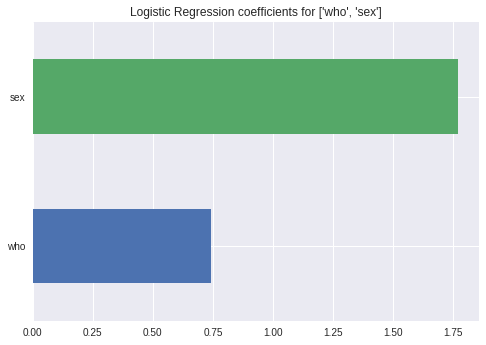

In [0]:
#PLOT WEIGHTS
pd.Series(log_model.coef_[0], log_features).plot.barh()
plt.title('Logistic Regression coefficients for ' + str(log_features))
plt.show()

##A Decision Tree

In [0]:
dec_features = ['who', 'fare', 'pclass']
dec_target = 'survived'

#LET'S TRY A RANGE OF DEPTHS
for n in range(6,10):      #CHOOSE N-DEGREES HERE

  #CREATE DECISION TREE MODEL
  dec_model = DecisionTreeClassifier(max_depth=n)
  dec_model.fit(train_procd[dec_features], train_procd[dec_target])

  
  #CALCULATE THE PREDICTIVE VALUES 
  dec_y_true = train_procd[dec_target] 
  dec_y_pred = dec_model.predict(train_procd[dec_features]) 
  dec_train_err = mean_absolute_error(dec_y_true, dec_y_pred) 
  dec_train_acc = accuracy_score(dec_y_true, dec_y_pred)
  print('Depth: ' + str(n)) 
#  print('Train Error: ' + str(dec_train_err)) 
  print('Train Accuracy: ' + str(accuracy_score(dec_y_true, dec_y_pred))) 
#  print('') 
#  print(matrix(dec_y_true, dec_y_pred))

  
  #TEST THE DECISION TREE

  #CALCULATE THE PREDICTIVE VALUES
  dec_y_true = test_procd[dec_target]
  dec_y_pred = dec_model.predict(test_procd[dec_features])
  dec_test_err = mean_absolute_error(dec_y_true, dec_y_pred)
  dec_test_acc = accuracy_score(dec_y_true, dec_y_pred)
                               
#  print('Test Error: ' + str(dec_test_err))
  print('Test Accuracy: ' + str(accuracy_score(dec_y_true, dec_y_pred)))
  print('')
#  print(matrix(dec_y_true, dec_y_pred))

Depth: 6
Train Accuracy: 0.8618618618618619
Test Accuracy: 0.8251121076233184

Depth: 7
Train Accuracy: 0.8678678678678678
Test Accuracy: 0.8340807174887892

Depth: 8
Train Accuracy: 0.8738738738738738
Test Accuracy: 0.8430493273542601

Depth: 9
Train Accuracy: 0.8828828828828829
Test Accuracy: 0.8609865470852018



###sex + age ~78.0% @ Depth = 4
###who + fare ~83% @ Depth = 8
##who + fare + pclass ~86% @ Depth = 9

In [0]:
import graphviz
from sklearn.tree import export_graphviz



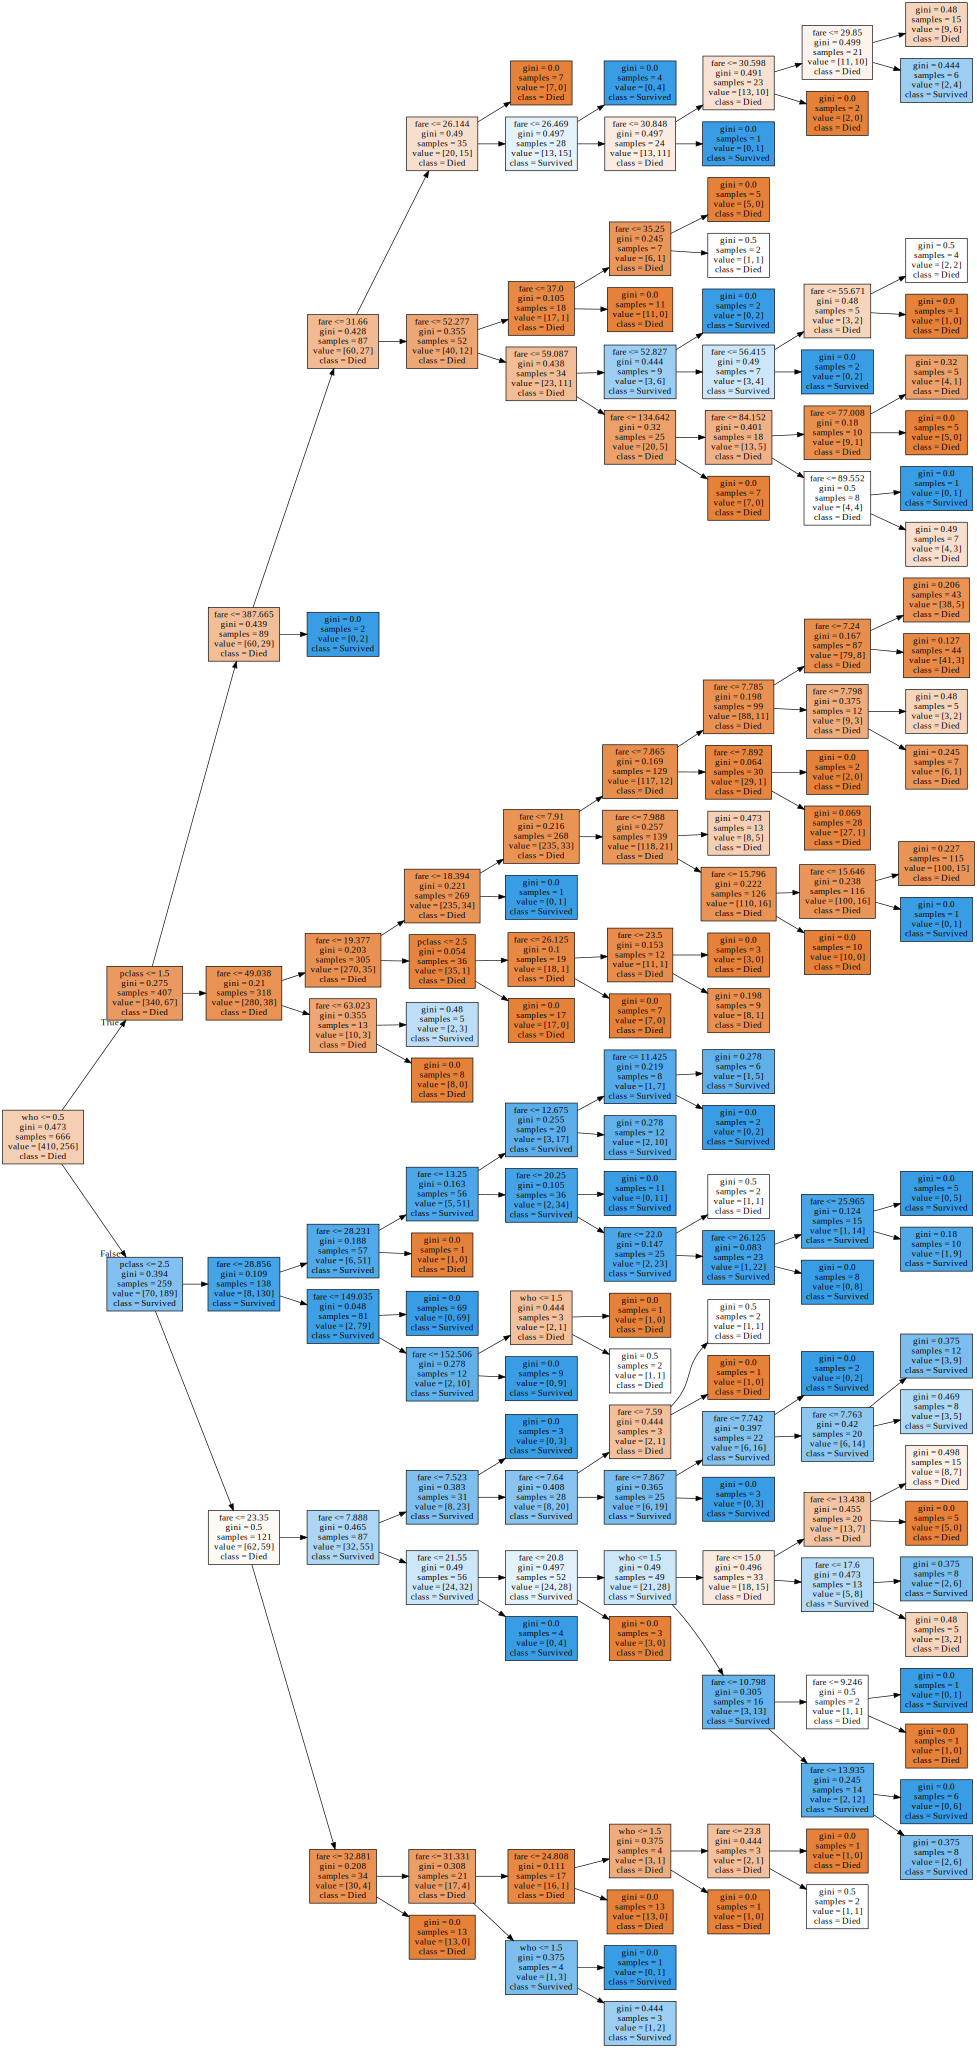

In [0]:
#WHAT DOES THE TREE LOOK LIKE?

Dec_Tree = export_graphviz(dec_model, out_file=None, feature_names=dec_features, 
                           class_names=['Died', 'Survived'], 
                           filled=True, impurity=True, rotate=True)
graphviz.Source(Dec_Tree)
